In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch import nn, optim
from torch. optim.lr_scheduler import ExponentialLR

In [2]:
from torchvision import datasets, transforms

train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=False)

batch_size = 4000
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1,4,(3,3), (2,2)),
            nn.Conv2d(4,8,(3,3), (2,2)),
            nn.Conv2d(8,16,(3,3), (2,2)),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 8, (4,4),(2,2)),
            nn.ConvTranspose2d(8, 4, (4,4),(2,2)),
            nn.ConvTranspose2d(4, 2, (4,4),(2,2), padding = 1),
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
model = Net()
model.to("cuda")



Net(
  (encoder): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(2, 2))
    (1): Conv2d(4, 8, kernel_size=(3, 3), stride=(2, 2))
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 8, kernel_size=(4, 4), stride=(2, 2))
    (1): ConvTranspose2d(8, 4, kernel_size=(4, 4), stride=(2, 2))
    (2): ConvTranspose2d(4, 2, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  )
)

In [49]:
optimizer = optim.Adam(model.parameters(), lr = 0.0005)
scheduler = ExponentialLR(optimizer, gamma=0.98)
criteria = nn.MSELoss()
cuda0 = torch.device('cuda:0')

for epoch in range(100):
    optimizer.zero_grad()
    for x_train, y_train in train_loader:
        x_train = x_train.cuda()
        outputs = model(x_train)
        loss = criteria(outputs, x_train)
        loss.backward()
        optimizer.step()
    scheduler.step()
    if (epoch + 1) % 2 == 0:
        for x_test, y_test in test_loader:
            x_test = x_test.cuda()
            outputs = model(x_test)
            test_loss = criteria(outputs, x_test)
        print("Epoch:", epoch, "Train_Loss:", loss.item(), "Test_Loss:", test_loss.item(), "Learning_Rate:", scheduler.optimizer.param_groups[0]['lr'])

c:\Users\ericy\anaconda3\envs\machine_learning\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([4000, 1, 28, 28])) that is different to the input size (torch.Size([4000, 2, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\ericy\anaconda3\envs\machine_learning\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([2000, 1, 28, 28])) that is different to the input size (torch.Size([2000, 2, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1 Train_Loss: 0.027115270495414734 Test_Loss: 0.027631839737296104 Learning_Rate: 0.00045125
Epoch: 3 Train_Loss: 0.02138785645365715 Test_Loss: 0.02162167616188526 Learning_Rate: 0.00040725312499999993
Epoch: 5 Train_Loss: 0.022510945796966553 Test_Loss: 0.021997816860675812 Learning_Rate: 0.0003675459453124999
Epoch: 7 Train_Loss: 0.02144600637257099 Test_Loss: 0.020708071067929268 Learning_Rate: 0.0003317102156445311
Epoch: 9 Train_Loss: 0.021022573113441467 Test_Loss: 0.020475560799241066 Learning_Rate: 0.00029936846961918924
Epoch: 11 Train_Loss: 0.020662566646933556 Test_Loss: 0.02032713033258915 Learning_Rate: 0.00027018004383131826
Epoch: 13 Train_Loss: 0.020443927496671677 Test_Loss: 0.02023412473499775 Learning_Rate: 0.00024383748955776472
Epoch: 15 Train_Loss: 0.020367339253425598 Test_Loss: 0.020168986171483994 Learning_Rate: 0.00022006333432588265
Epoch: 17 Train_Loss: 0.020548753440380096 Test_Loss: 0.020110582932829857 Learning_Rate: 0.00019860715922910907
Epoch: 

KeyboardInterrupt: 

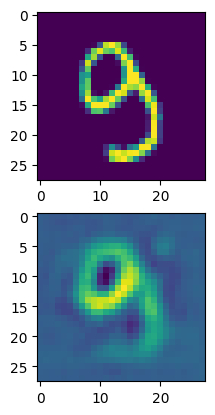

In [57]:
fig, ax = plt.subplots(2)
torch.no_grad()
x_train, y_train = next(iter(train_loader))
x_train = x_train.cuda()
output = model(x_train).cpu().detach().numpy()
ax[0].imshow(x_train.cpu()[0,0])
ax[1].imshow(output[0,0])